# Max Becker

## Research question/interests

I am interested in the ideal size of a hockey player. Whether it is the best size for scoring based off of the data present or the ideal size for a goalie, it will be interesting to discover the ideal size for different roles and allow people to compare themselves to this analysis.

### Step one of analysis Pipeline Loading data.

In [17]:
import pandas as pd
nhlData=pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=";")
nhlData

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


#### Step 2 of analysis Pipeline, Cleaning data by dropping columns I will not be using (anything not to do with player size and points) and removing missing data.

In [30]:
nhlSkaterSize_GoalsInitialClean=nhlData.drop(["Date_of_birth","TEAM","Place_of_birth","Saves","Save_Percentage","Shutouts","Goals_Against","Goals_Against_Average","Shots_Against",
                                   "Time_on_Ice_per_Game",'Games_Started','Number',"Overtime_Losses","Ties","PowerPlay_Goals","PowerPlay_Assists","Short_Goals",
                                    "Short_Assists","Game_Tying_Goals","SEASON","Game_Winning_Goals","Production","Wins","Losses","Experience","PlusMinus_Ratings", "Penalty_Minutes",
                                             "Position"],axis=1)
nhlSkaterSize_GoalsInitialClean

,Name,SEASON_year,Games_Played,Goals,Assists,Points,Shots_on_Goal,Shooting_Percentage,Height,Weight,Body_mass_index,Age
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,185,98,28.6,26
1,Aaron Downey,2001,3,0.0,0.0,0.0,2.0,0.0,185,98,28.6,27
2,Aaron Downey,2002,36,1.0,0.0,1.0,10.0,10.0,185,98,28.6,28
3,Aaron Downey,2003,43,1.0,1.0,2.0,14.0,7.1,185,98,28.6,29
4,Aaron Downey,2004,37,1.0,1.0,2.0,11.0,9.1,185,98,28.6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,2001,73,38.0,51.0,89.0,217.0,17.5,178,85,26.8,29
27315,Zigmund Palffy,2002,63,32.0,27.0,59.0,161.0,19.9,178,85,26.8,30
27316,Zigmund Palffy,2003,76,37.0,48.0,85.0,277.0,13.4,178,85,26.8,31
27317,Zigmund Palffy,2004,35,16.0,25.0,41.0,109.0,14.7,178,85,26.8,32


#### Step 2 of Analysis Pipeline Cleaning Data by removing rows that are not relevant in my EDA (data from earlier than 2000).
This removes rows with Season_year less than 2000 which I then reindex.

In [31]:
nhlSkaterSize_GoalsInitialClean2000s = nhlSkaterSize_GoalsInitialClean.drop(nhlSkaterSize_GoalsInitialClean[nhlSkaterSize_GoalsInitialClean["SEASON_year"] < 2000].index)
nhlSkaterSize_GoalsInitialClean2000s=nhlSkaterSize_GoalsInitialClean2000s.reset_index(drop=True)
nhlSkaterSize_GoalsInitialClean2000s

,Name,SEASON_year,Games_Played,Goals,Assists,Points,Shots_on_Goal,Shooting_Percentage,Height,Weight,Body_mass_index,Age
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,185,98,28.6,26
1,Aaron Downey,2001,3,0.0,0.0,0.0,2.0,0.0,185,98,28.6,27
2,Aaron Downey,2002,36,1.0,0.0,1.0,10.0,10.0,185,98,28.6,28
3,Aaron Downey,2003,43,1.0,1.0,2.0,14.0,7.1,185,98,28.6,29
4,Aaron Downey,2004,37,1.0,1.0,2.0,11.0,9.1,185,98,28.6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
17215,Zigmund Palffy,2001,73,38.0,51.0,89.0,217.0,17.5,178,85,26.8,29
17216,Zigmund Palffy,2002,63,32.0,27.0,59.0,161.0,19.9,178,85,26.8,30
17217,Zigmund Palffy,2003,76,37.0,48.0,85.0,277.0,13.4,178,85,26.8,31
17218,Zigmund Palffy,2004,35,16.0,25.0,41.0,109.0,14.7,178,85,26.8,32


#### More of Step 2 of the Analysis Pipeline cleaning data by removing any null values in the dataframe.

In [32]:
nhlSkaterSize_Success_cleaned=nhlSkaterSize_GoalsInitialClean2000s.dropna()
nhlSkaterSize_Success_cleaned=nhlSkaterSize_Success_cleaned.reset_index(drop=True)
nhlSkaterSize_Success_cleaned

,Name,SEASON_year,Games_Played,Goals,Assists,Points,Shots_on_Goal,Shooting_Percentage,Height,Weight,Body_mass_index,Age
0,Aaron Downey,2000,1,0.0,0.0,0.0,0.0,0.0,185,98,28.6,26
1,Aaron Downey,2001,3,0.0,0.0,0.0,2.0,0.0,185,98,28.6,27
2,Aaron Downey,2002,36,1.0,0.0,1.0,10.0,10.0,185,98,28.6,28
3,Aaron Downey,2003,43,1.0,1.0,2.0,14.0,7.1,185,98,28.6,29
4,Aaron Downey,2004,37,1.0,1.0,2.0,11.0,9.1,185,98,28.6,30
...,...,...,...,...,...,...,...,...,...,...,...,...
15576,Zigmund Palffy,2001,73,38.0,51.0,89.0,217.0,17.5,178,85,26.8,29
15577,Zigmund Palffy,2002,63,32.0,27.0,59.0,161.0,19.9,178,85,26.8,30
15578,Zigmund Palffy,2003,76,37.0,48.0,85.0,277.0,13.4,178,85,26.8,31
15579,Zigmund Palffy,2004,35,16.0,25.0,41.0,109.0,14.7,178,85,26.8,32


#### Step 3/4 of Analysis Pipeline Processing and Wrangling Data so that duplicates are merged together and therefore total goals per player is shown
#### Also rearranged data in a more organized manner from left to right.

In [46]:
nhlSkaterSize_Success_cleaned_grouped = nhlSkaterSize_Success_cleaned.groupby(["Name","Height","Weight","Body_mass_index"],as_index=False)[["Games_Played","Goals", "Assists", "Shots_on_Goal", "Points"]].sum()
nhlSkaterSize_Success_cleaned_grouped

,Name,Height,Weight,Body_mass_index,Games_Played,Goals,Assists,Shots_on_Goal,Points
0,Aaron Downey,185,98,28.6,243,8.0,10.0,85.0,18.0
1,Aaron Gagnon,180,85,26.2,38,3.0,2.0,28.0,5.0
2,Aaron Gavey,188,86,24.3,197,23.0,32.0,224.0,55.0
3,Aaron MacKenzie,183,88,26.3,5,0.0,0.0,3.0,0.0
4,Aaron Miller,190,94,26.0,475,13.0,64.0,353.0,77.0
...,...,...,...,...,...,...,...,...,...
2425,Zdeno Chara,206,113,26.6,1469,203.0,444.0,3205.0,647.0
2426,Zdeno Ciger,185,91,26.6,56,12.0,13.0,92.0,25.0
2427,Zenith Komarniski,183,91,27.2,21,1.0,1.0,22.0,2.0
2428,Zenon Konopka,183,97,29.0,346,12.0,18.0,200.0,30.0


#### Making a correlation matrix/ Heatmap for EDA to find general correlations between columns.

<AxesSubplot:>

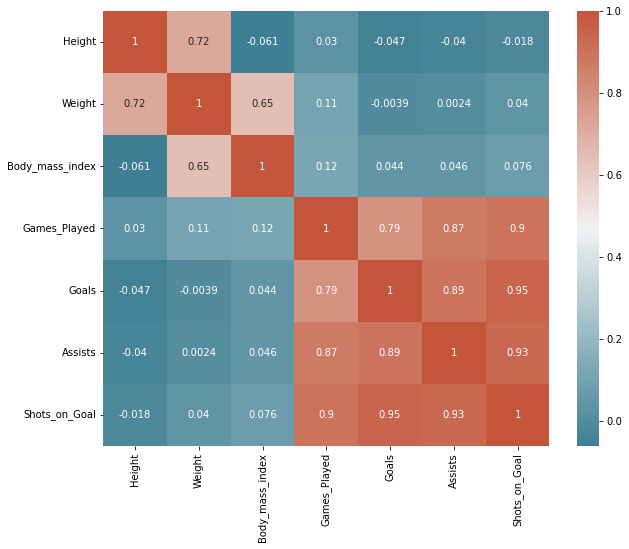

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = nhlSkaterSize_Success_cleaned_grouped.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Using a scatter plot for EDA of Height and Goals relationship, normal distribution with median around 185/186 cm.

<AxesSubplot:xlabel='Height', ylabel='Goals'>

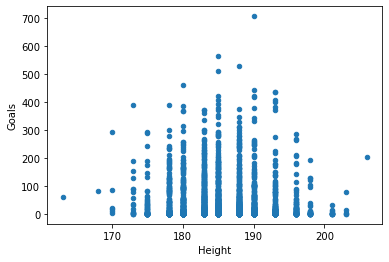

In [41]:
nhlSkaterSize_Success_cleaned_grouped.plot(kind='scatter', x='Height', y='Goals')

### Using another scatter plot for EDA of Weight and Goals relationship, negative skew median around 95kg.

<AxesSubplot:xlabel='Weight', ylabel='Goals'>

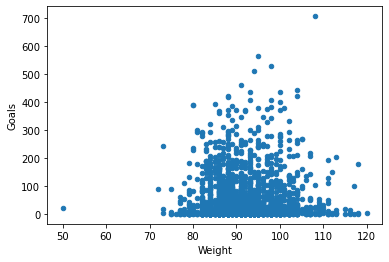

In [42]:
nhlSkaterSize_Success_cleaned_grouped.plot(kind='scatter', x='Weight', y='Goals')

### Using a scatter plot to visualize the relationship between BMI and Goals, negative skew with median around 27.4.

<AxesSubplot:xlabel='Body_mass_index', ylabel='Goals'>

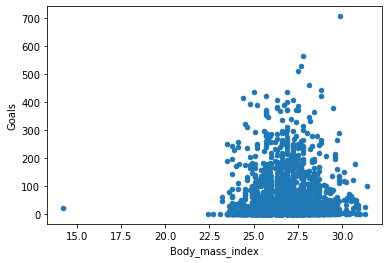

In [43]:
nhlSkaterSize_Success_cleaned_grouped.plot(kind='scatter', x="Body_mass_index", y='Goals')